# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\melan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = '2f2f59585fd941789f0bd1f1bc249e60'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8676


{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'Is Bitcoin a safe bet?',
 'description': 'The digital cryptocurrency Bitcoin has tripled in value in the past three years. Will the boom only lead to a bigger bust?',
 'url': 'https://www.cnn.com/videos/business/2021/02/20/is-bitcoin-a-safe-bet-smerconish-vpx.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/210220112649-smerconish-bitcoin-guests-split-super-tease.jpg',
 'publishedAt': '2021-02-20T17:12:04Z',
 'content': None}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 2048


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'The climate controversy swirling around NFTs',
 'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
 'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
 'publishedAt': '2021-03-15T13:51:11Z',
 'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
        
# Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(bitcoin_headlines, 'content')
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,Some things are best left a mystery at least a...,0.6369,0.000,0.887,0.113
1,,0.0000,0.000,0.000,0.000
2,"Bitcoin is the future, again: this morning, it...",0.7041,0.000,0.860,0.140
3,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.000,0.754,0.246
4,A proposed law in India would make it a crime ...,-0.2500,0.095,0.838,0.068
5,New York (CNN Business)Bitcoin's roller coaste...,0.1027,0.000,0.958,0.042
6,Blockchain.com has announced that it has raise...,0.5994,0.000,0.855,0.145
7,"This morning Coinbase, an American cryptocurre...",0.4404,0.000,0.912,0.088
8,"February\r\n19, 2021\r\n3 min read\r\nThis sto...",0.0000,0.000,1.000,0.000
9,By Reuters Staff\r\nFILE PHOTO: A collection o...,0.0000,0.000,1.000,0.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(ethereum_headlines, 'content')
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,Famed auction house Christies just sold its fi...,0.0000,0.000,1.000,0.000
1,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.119,0.818,0.063
2,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.145,0.789,0.066
3,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.000,0.909,0.091
4,While the first Christie's auction of digital ...,0.0258,0.000,0.970,0.030
5,Attempting to get ahead of cryptocurrency mine...,0.7096,0.000,0.856,0.144
6,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.000,0.861,0.139
7,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.000,0.865,0.135
8,Ethereum rose by 7.34% in the week ending 21st...,0.0000,0.000,1.000,0.000
9,Some things are best left a mystery at least a...,0.6369,0.000,0.887,0.113


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.219783,0.016778,0.859500,0.068167
std,0.360042,0.040313,0.228093,0.070671
min,-0.361200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.051350,0.000000,0.917500,0.069000
75%,0.559650,0.000000,0.989500,0.108000
max,0.831600,0.137000,1.000000,0.246000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.224570,0.023950,0.898000,0.078100
std,0.382841,0.046013,0.068705,0.060135
min,-0.458800,0.000000,0.754000,0.000000
25%,0.000000,0.000000,0.859750,0.053250
50%,0.307100,0.000000,0.909000,0.073500
75%,0.473275,0.012000,0.931500,0.096500
max,0.831600,0.145000,1.000000,0.246000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium at 0.078100 versus 0.068167 for Bitcoin

Q: Which coin had the highest compound score?

A: Tied at 0.831600 max compound score

Q. Which coin had the highest positive score?

A: Tied at 0.246000 max positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'tldr', 'reuters', 'stafffile', 'photo', 'poster', 'ha', 'char'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    lower = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return lower

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,Some things are best left a mystery at least a...,0.6369,0.000,0.887,0.113,"[thing, best, left, mystery, least, far, coinb..."
1,,0.0000,0.000,0.000,0.000,[]
2,"Bitcoin is the future, again: this morning, it...",0.7041,0.000,0.860,0.140,"[bitcoin, future, morning, hit, alltime, high,..."
3,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.000,0.754,0.246,"[enter, complete, bitcoin, btc, investment, gi..."
4,A proposed law in India would make it a crime ...,-0.2500,0.095,0.838,0.068,"[proposed, law, india, would, make, crime, min..."
5,New York (CNN Business)Bitcoin's roller coaste...,0.1027,0.000,0.958,0.042,"[new, york, cnn, businessbitcoins, roller, coa..."
6,Blockchain.com has announced that it has raise...,0.5994,0.000,0.855,0.145,"[blockchaincom, announced, raised, million, fu..."
7,"This morning Coinbase, an American cryptocurre...",0.4404,0.000,0.912,0.088,"[morning, coinbase, american, cryptocurrency, ..."
8,"February\r\n19, 2021\r\n3 min read\r\nThis sto...",0.0000,0.000,1.000,0.000,"[february, min, readthis, story, originally, a..."
9,By Reuters Staff\r\nFILE PHOTO: A collection o...,0.0000,0.000,1.000,0.000,"[collection, bitcoin, virtual, currency, token..."


In [14]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,Famed auction house Christies just sold its fi...,0.0000,0.000,1.000,0.000,"[famed, auction, house, christies, sold, first..."
1,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.119,0.818,0.063,"[worried, geforce, rtx, sold, cryptocurrency, ..."
2,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.145,0.789,0.066,"[nfts, latest, cryptocurrency, rage, day, band..."
3,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.000,0.909,0.091,"[nfts, nonfungible, token, scarce, digital, co..."
4,While the first Christie's auction of digital ...,0.0258,0.000,0.970,0.030,"[first, christies, auction, digital, artwork, ..."
5,Attempting to get ahead of cryptocurrency mine...,0.7096,0.000,0.856,0.144,"[attempting, get, ahead, cryptocurrency, miner..."
6,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.000,0.861,0.139,"[new, york, ethereum, second, largest, cryptoc..."
7,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.000,0.865,0.135,"[new, york, feb, ethereum, second, largest, cr..."
8,Ethereum rose by 7.34% in the week ending 21st...,0.0000,0.000,1.000,0.000,"[ethereumrose, week, ending, st, february, fol..."
9,Some things are best left a mystery at least a...,0.6369,0.000,0.887,0.113,"[thing, best, left, mystery, least, far, coinb..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams_df = [btc for bits in btc_sentiment_df['tokens'] for btc in bits]
btc_gram_counts = Counter(ngrams(btc_ngrams_df, n=2))
btc_gram_counts.most_common(20)

[(('cryptocurrency', 'exchange'), 2),
 (('alltime', 'high'), 2),
 (('investment', 'giveaway'), 2),
 (('virtual', 'currency'), 2),
 (('illustration', 'taken'), 2),
 (('thing', 'best'), 1),
 (('best', 'left'), 1),
 (('left', 'mystery'), 1),
 (('mystery', 'least'), 1),
 (('least', 'far'), 1),
 (('far', 'coinbase'), 1),
 (('coinbase', 'concernedthe'), 1),
 (('concernedthe', 'san'), 1),
 (('san', 'franciscobased'), 1),
 (('franciscobased', 'cryptocurrency'), 1),
 (('exchange', 'preparing'), 1),
 (('preparing', 'go'), 1),
 (('go', 'public'), 1),
 (('public', 'since'), 1),
 (('since', 'last'), 1)]

In [17]:
# Generate the Ethereum N-grams where N=2
eth_ngrams_df = [btc for bits in eth_sentiment_df['tokens'] for btc in bits]
eth_gram_counts = Counter(ngrams(eth_ngrams_df, n=2))
eth_gram_counts.most_common(20)

[(('record', 'high'), 3),
 (('cryptocurrency', 'miner'), 2),
 (('nonfungible', 'token'), 2),
 (('new', 'york'), 2),
 (('ethereum', 'second'), 2),
 (('second', 'largest'), 2),
 (('largest', 'cryptocurrency'), 2),
 (('cryptocurrency', 'term'), 2),
 (('term', 'market'), 2),
 (('market', 'capitalization'), 2),
 (('capitalization', 'volume'), 2),
 (('volume', 'hit'), 2),
 (('hit', 'record'), 2),
 (('high', 'thursday'), 2),
 (('thursday', 'lifted'), 2),
 (('lifted', 'growing'), 2),
 (('growing', 'institutional'), 2),
 (('institutional', 'interest'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('asian', 'trading'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_ngrams_df)

[('bitcoin', 10),
 ('cryptocurrency', 5),
 ('new', 4),
 ('exchange', 3),
 ('morning', 3),
 ('high', 3),
 ('investment', 3),
 ('trading', 3),
 ('market', 3),
 ('price', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_ngrams_df)

[('cryptocurrency', 8),
 ('new', 8),
 ('ethereum', 7),
 ('bitcoin', 7),
 ('digital', 5),
 ('week', 5),
 ('high', 4),
 ('sold', 3),
 ('million', 3),
 ('nfts', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

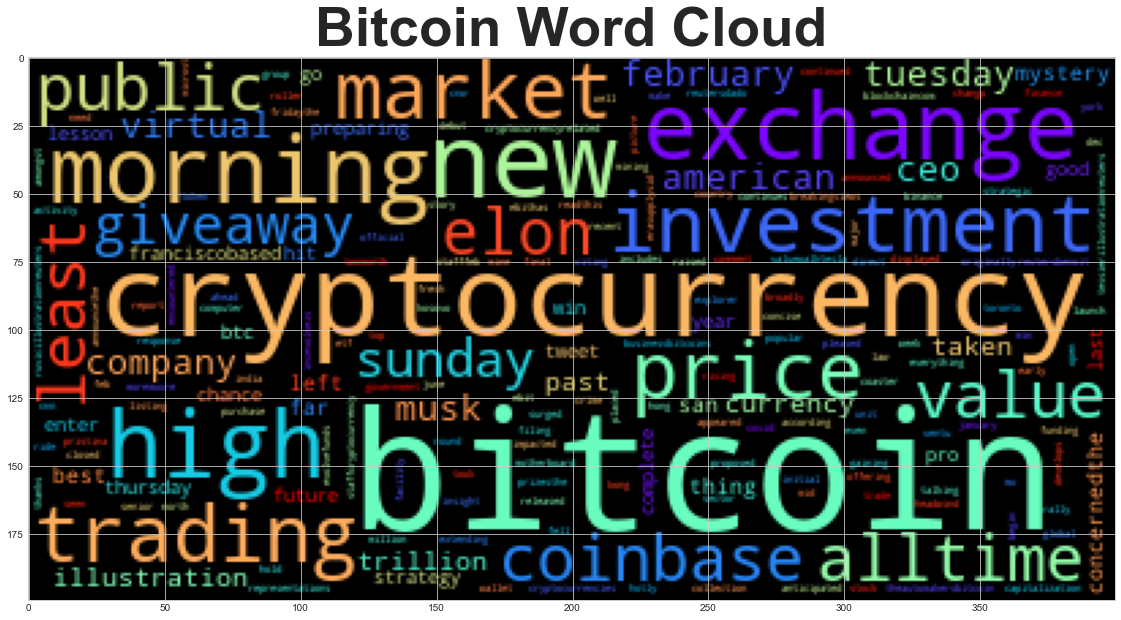

In [22]:
# Generate the Bitcoin word cloud
big_string = ' '.join([btc for bits in btc_sentiment_df['tokens'] for btc in bits])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Bitcoin Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

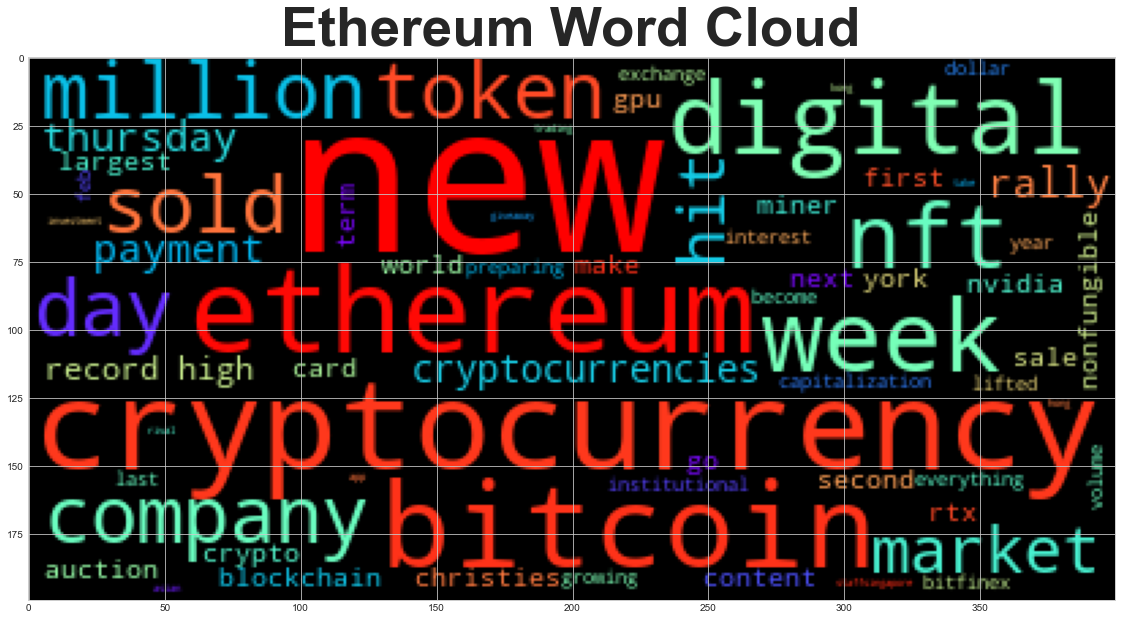

In [23]:
# Generate the Ethereum word cloud
big_string = ' '.join([eth for ets in eth_sentiment_df['tokens'] for eth in ets])
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Ethereum Word Cloud", {"fontsize":55, "fontweight": "bold"})
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
nlp

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_content_df = ' '.join(btc_sentiment_df['content'])
btc_content_df

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars] TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars] A proposed law in India would make it a crime to mine, trade, or even hold cryptocurrencies like bitcoin in the country, according to a new report from Reuters citing a senior government official. It… [+1725 chars] New York (CNN Business)Bitcoin\'s roller coaster ride continues. The top cryptocurrency surged to a new all-time high above $58,000

In [29]:
# Run the NER processor on all of the text
doc = nlp(btc_content_df)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [30]:
# Render the visualization
displacy.render(doc, style='ent')

In [31]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
over $12,000 MONEY
India GPE
Reuters ORG
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Blockchain.com ORG
$120 million MONEY
Moore Strategic Ventu PERSON
This morning TIME
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
Feb. 19, 2021 DATE
Evolve WORK_OF_ART
week of February DATE
North American NORP
4 CARDINAL
4 CARDINAL
Bitcoin PERSON
past $56,000 MONEY
Friday DATE
$1 trillion MONEY
7 CARDINAL
7 CARDINAL
one CARDINAL
above $50,000 MONEY
Tuesday DATE
morning TIME
noon TIME
Eastern Time ORG

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_content_df = ' '.join(eth_sentiment_df['content'])
eth_content_df

'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most nota

In [35]:
# Run the NER processor on all of the text
doc = nlp(eth_content_df)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER"

In [36]:
# Render the visualization
displacy.render(doc, style='ent')

In [37]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters

---